> Auteurs :  
> - Ayoub Aarab (ayoub.aarab@etu.umontpellier.fr)  
> - Clément Poncheele (clement.poncheele@etu.umontpellier.fr)  
> - Assia Berrandou (assia.berrandou@etu.umontpellier.fr)  
> - Laura El Kaïm (laura.el-kaim@etu.umontpellier.fr)  

# TP5 - Perceptron multicouche

L’objectif de ce TP est d’étudier les réseaux de neurones artificiels de type Perceptron MultiCouche (MLP) sur deux problèmes archi-classiques : le XOR et les Digits. Nous utiliserons le module `sklearn.neural_network` et plus particulièrement la fonction `MLPClassifier` qui fournit une implémentation du Perceptron MultiCouche pour la classification.

In [332]:
# Import Part

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold,GridSearchCV, cross_val_score, train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


## Partie I : Apprentissage de fonctions booléennes

On s’intéresse à l’apprentissage des fonctions booléennes AND, OR et XOR par un MLP. Nous rappelons la définition de ces opérateurs ci-dessous : 

<center>
<img src="Images/table.jpg" alt="Drawing" style="width: 45%; height = 45%"/>
</center>

$$\text{Figure 1 : Table des opérateurs}$$

Dans notre cas, le perceptron prend en entrée un vecteur de dimensions $2$ et effectue une séparation entre ces données afin de donner une sortie i.e déterminer la classe ($0$ ou $1$) auquelle appartient chaque donnée. Par la suite, si nous avons un nouveau vecteur, nous pourrons prédire la classe de chaque observation de ce dernier.

En Python, nous utiliserons une variable $X_{train}=(X_1,X_2)$ contenant l’ensemble des entrées fournies au MLP et une variable $Y_{train}$ contenant l’ensemble des résultats attendus correspondants aux différentes entrées en fonction de l'opérateur.
Ces résultats sont définis ci-dessous pour chacun des opérateurs : `AND`, `OR`, et `XOR`.  
Puis nous définissons également la variable  : $X_{test}=
\begin{bmatrix} 
0 & 0 \\
1 & 1 \\
0 & 0 \\
1 & 0 \\
0 & 1 
\end{bmatrix}$ 
Cette dernière nous permettra de tester les prédictions faites par les différents classifieurs MLP.

In [333]:
# Base d'apprentissage
X_train = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]] #Entrées
Y_train_and= [0, 0, 0, 1] # Résultats attendus
Y_train_or = [0, 1, 1, 1]
Y_train_xor = [0, 1, 1, 0]

#Base d'entrainement
X_test = [[0., 0.], [1., 1.], [0., 0.], [1., 0.], [0., 1.]]

### Question 1 : Présentation des données

Le MLP prend en entrée un vecteur binaire ($2$ bits). 
 - Pour l'opérateur `AND` : Si $X_1 =1 $ et $X_2 = 1$, le classifieur retourne $1$, $0$ sinon,
 - Pour l'opérateur `OR` : Si $X_1=0$ et $X_2=0$, le classifieur retourne $0$ , $1$ sinon,
 - Pour l'opérateur `XOR` : Si $X_1$ et $X_2$ sont identiques, le classifieur retourne $0$, $1$ sinon.

 Nous avons représenté graphiquement ces résultats :
 


<center>
<img src="Images/AND_graphique.jpg" alt="Drawing" style="width: 35%; height = 35%"/>

<img src="Images/OR_graphique.jpg" alt="Drawing" style="width: 32.5%; height = 32.5%"/>
</center>

$$ \text{Figures 2 et 3 : Opérateurs AND et OR}$$                 

Pour l'opérateur `OR` et `AND`, la classification est envisageable sous forme de séparation linéaire. C'est-à-dire qu'il est possible de tracer une droite séparant ainsi les données en $2$ groupes. 

<center>
<img src="Images/xor.png" alt="Drawing" style="width: 31%; height = 31%"/>
<img src="Images/xor2.png" alt="Drawing" style="width: 32.2%; height = 32.2%"/>
</center>

$$\text{Figures 4 et 5 : Opérateur XOR }$$

Les points en rouge appartiennent à la classes $0$ et à l'inverse les points en bleu appartiennent à la classe $1$.

Pour l'opérateur `XOR`, la classification n'est pas envisageable sous forme de séparation linéaire. C'est-à-dire qu'il n'est pas possible de tracer une seule droite afin de séparer les données en $2$ groupes. Cependant, si l'on utilise une séparation non-linéaire i.e deux droites, la classification est possible.


Le réseau de neurones MLP agit telle une fonction affine, i.e. les entrées sont séparées par des droites. Ainsi, le nombre de découpes dépend de la complexité du réseau de neurones. Pour les opérateurs `AND` et `OR`, une seule coupe est nécessaire, alors que pour le `XOR` il en faut $2$.
C'est pourquoi, le réseau de neurones de l'opérateur `XOR` est plus complexe que celui du `AND` et du `OR`.


### Question 2 : Classifieur pour l'opérateur `AND`

Définissons un classifieur MLP à aucune couche cachée dont la fonction d'activation est linéaire et dont le solver est de type `lbfgs` pour apprendre l'opérateur `AND`.  


In [335]:
clf_and = MLPClassifier(hidden_layer_sizes=(),
                    activation='identity', solver='lbfgs')
clf_and.fit(X_train, Y_train_and)
print(clf_and.predict(X_test))

[0 1 0 0 0]


Une fois le réseau de neurones entraîné, on peut tester le classifieur sur le vecteur $X_{test}$ :

In [336]:
print(clf_and.predict(X_test))

[0 1 0 0 0]


Nous nous attendons à obtenir le vecteur $(0, 1, 0, 0, 0)$  pour la prédiction de $X_{test}$. Comme nous pouvons le voir ci-dessus, c'est bien le résultat que nous avons et donc les prédictions sont correctes.

### Question 3 : Classifieur pour l'opérateur `OR`

Comme précédemment, pour apprendre l'opérateur `OR`, nous définissons un classifieur MLP à aucune couche cachée dont la fonction d'activation est linéaire et dont le solver est de type `lbfgs`.

In [317]:
# Pour operateur OR
clf_or = MLPClassifier(hidden_layer_sizes=(),
                    activation='identity', solver='lbfgs')
clf_or.fit(X_train, Y_train_or)

MLPClassifier(activation='identity', hidden_layer_sizes=(), solver='lbfgs')

Une fois le réseau de neurones entraîné, on peut tester le classifieur sur le vecteur $X_{test}$ :

In [337]:
print(clf_or.predict(X_test))

[0 1 0 1 1]


Nous nous attendons à obtenir le vecteur $(0, 1, 0, 1, 1)$  pour la prédiction de $X_{test}$. Comme nous pouvons le voir ci-dessus, c'est bien le résultat que nous avons et donc les prédictions sont correctes.

### Question 4 : Classifieur pour l'opérateur `XOR`

a) Pour apprendre l'opérateur `XOR`, nous définissons un classifieur MLP à aucune couche cachée dont la fonction d'activation est linéaire et dont le solver est de type `lbfgs`.

In [338]:
# Pour operateur X0R
clf_xor0= MLPClassifier(hidden_layer_sizes=(),
                    activation='identity', solver='lbfgs')
clf_xor0.fit(X_train, Y_train_xor)

MLPClassifier(activation='identity', hidden_layer_sizes=(), solver='lbfgs')

Une fois le réseau de neurones entraîné, on peut tester le classifieur sur le vecteur $X_{test}$ :

In [339]:
print(clf_xor0.predict(X_test))

[1 1 1 1 1]


Avec l'opérateur `XOR`, nous nous attendons à obtenir le vecteur $(0 , 0 , 0 , 1,  1)$ pour $X_{test}$. Cependant, nous n'obtenons pas ce résultat. 
En exécutant plusieurs fois de suite le code ci-dessus (code du classifieur), le vecteur prédit n'est pas systématiquement le même et n'est jamais correct.  

Ici, nous n'utilions aucune couche cachée. Or comme nous l'avons vu sur les figures $4$ et $5$, les classes formées par l'opérateur `XOR` ne sont pas linéairement séparables. Nous nous attendions donc à ce résultat.  
Il semblerait alors que le perceptron multicouches grâce à l'ajout de couches cachées puisse pallier ce problème.

b) Cette fois-ci nous allons changer les paramètres de notre classifieur pour apprendre l'opérateur `XOR`. Nous utiliserons deux couches cachées composées de $4$ neurones en première couche et $2$ neurones en deuxième couche, i.e nous changerons les valeurs du tuple `hidden_layer_sizes`. Ici nous aurons `hidden_sizes_layer=(4, 2)`.

Les autres paramètres restent inchangés : activations linéaires et solver de type `lbfgs`.  

In [340]:
# On est toujours avec l operateur XOR
clf_xor2 = MLPClassifier(hidden_layer_sizes=(4, 2),
                    activation='identity', solver='lbfgs')
clf_xor2.fit(X_train, Y_train_xor)

MLPClassifier(activation='identity', hidden_layer_sizes=(4, 2), solver='lbfgs')

Une fois le réseau de neurones entraîné, on peut tester le classifieur sur le vecteur $X_{test}$ :

In [341]:
print(clf_xor2.predict(X_test))

[0 0 0 1 0]


Nous nous attendons toujours à obtenir la prédiction $(0, 0, 0, 1, 1)$, mais le problème reste le même. 
En effet, les données de l'opérateur `XOR` ne sont pas linéairement séparables, et il semblerait que l'ajout de couches ne soit pas suffisant. 

Une approche par des fonctions d'activation non-linéaires peut être une solution à ce problème. Plus précisément, la fonction d'activation linéaire permet de modéliser une variable réponse qui varie linéairement avec ses variables explicatives. Par linéairement, nous entendons que la sortie peut être reproduite à partir d'une combinaison linéaire des entrées. De cette façon, sans fonctions d'activation non-linéaires dans le réseau, peu importe le nombre de couches qu'on lui affecte, celui-ci va se comporter comme un perceptron monocouche. Ceci est dû au fait que la somme de ses couches ne donnerait qu'une autre fonction linéaire.


c) Toujours en utilisant $2$ couches composées de $4$ neurones en première couche et 2 neurones en deuxième couche et un solver de type `lbfgs`, nous allons cette fois changer les fonctions d'activation. Ces dernières seront non-linéaires de type tangente hyperbolique (fonction `tanh`).

In [342]:
clf_xor_tan = MLPClassifier(hidden_layer_sizes=(4, 2),
                        activation='tanh', solver='lbfgs')
clf_xor_tan.fit(X_train, Y_train_xor)

MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 2), solver='lbfgs')

Une fois le réseau de neurones entraîné, on peut tester le classifieur sur le vecteur $X_{test}$ :

In [343]:
print(clf_xor_tan.predict(X_test))

[0 0 0 1 1]


Nous exécutons une première fois le code ci-dessus et la prédiction est correcte. Nous réitérons la commande un grand nombre de fois et il semblerait que dans la majorité des cas la prédiction soit bonne et que dans les autres, elle en soit proche (une valeur sur $5$ est mauvaise). Par exemple, l'algorithme a prédit le vecteur $(0, 0, 0 ,0, 1)$ (mauvaise prédiction) au bout d'environ $45$ bonnes prédictions. Cela peut s'expliquer par le fait que la matrice de poids est aléatoire.

In [347]:
#Bonne réponse de X_test
Y_test_xor = [0, 0, 0, 1, 1]

#Test sur 200 itérations
erreur = 0 
for i in range(0,200):
    clf_xor_tan = MLPClassifier(hidden_layer_sizes=(4, 2),
                        activation='tanh', solver='lbfgs')
    clf_xor_tan.fit(X_train, Y_train_xor)
    if (np.array_equal(Y_test_xor, clf_xor_tan.predict(X_test))==False):
        erreur = erreur+1
    
print("Nous testons le classifieur sur la base de test X_test. On réitère 200 fois l'algorithme créant le classifieur. Le taux d'erreur du classifieur est :", erreur/200*100,"%.")

Nous testons le classifieur sur la base de test X_test. On réitère 200 fois l'algorithme créant le classifieur. Le taux d'erreur du classifieur est : 9.0 %.


## Partie II : Classification d'images

On s’intéresse cette fois à un problème d’apprentissage plus difficile : l’identification du chiffre (manuscrit) contenu dans une image.

### Question 5 : Présentation des données et classifieur

Nous allons utiliser ici le jeu de données `DIGITS` disponible via la librairie `scikit-learn`. 
Ce jeu de données est composé de $1797$ images de taille $8*8$ px. Chaque image comportent donc $64$ pixels. Elles sont stockées sous la forme de vecteurs lignes de dimension $64$.

Nous avons la matrice $X$ de taille $1797*64$ et le vecteur colonne $Y$ de taille $1794*1$ composé de $10$ classes où la $i$-ème ligne du vecteur correspond à la classe de la $i$-ème image ($i$-ème ligne de X).

La problématique de classification sera la prédiction de $Y$.

<center>
<img src="Images/digits.jpg" alt="Drawing" style="width: 35%; height = 35%"/>

$$\text{Figure 5 : La 15ème image représente un 5}$$
</center>

In [348]:
#présentation des données
dataset = load_digits() 
X = dataset.data  # Entrees
Y = dataset.target  # Resultats attendus

print("Nombre de pixels par image:      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(Y))))

Nombre de pixels par image:      64
Nombre d'observations : 1797
Nombre de classes :     10


Dans la suite, nous découpons le jeu de données comme suit : $90 \%$ des données sont pour la base d'apprentissage et $10 \%$ des données sont pour l'ensemble de test.

Ainsi, le classifieur sera entraîné sur la base d'apprentissage et sa capacité de généralisation sera évaluée sur la base de test.

In [350]:
# Decoupage du jeu de donnees en une base d apprentissage et une base de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1) 

Faisons varier les paramètres de `MLPClassifier` (nombre de couches cachées, nombre de neurones par couche, fonctions d'activation et solver).

In [351]:
# Classifieurs

clf0 = MLPClassifier(hidden_layer_sizes=(),
                    activation='identity', solver='lbfgs')
clf0.fit(X_train, Y_train)
# Aucune couche cachee, activation lineaire, solver de type lbfgs

clf01 = MLPClassifier(hidden_layer_sizes=(),
                    activation='tanh', solver='lbfgs')
clf01.fit(X_train, Y_train)
# Aucune couche cachee, activation non-lineaire de type tangente
# hyperbolique, solver de type lbfgs

clf1 = MLPClassifier(hidden_layer_sizes=(4, 2),
                    activation='identity', solver='lbfgs')
clf1.fit(X_train, Y_train)
# Deux couches cachees de 4 neurones et 2 neurones, activation lineaire,
# solver de type lbfgs

clf2 = MLPClassifier(hidden_layer_sizes=(4, 2),
                    activation='tanh', solver='lbfgs')
clf2.fit(X_train, Y_train)


# Deux couches cachees de 4 neurones et 2 neurones, activation 
# non-lineaire de type tangente hyperbolique, solver de type lbfgs

# On peut tester d autres parametres :
# activation : `logistic` (logistic sigmoid function), `relu`
# (rectified linear unit function)
# (stochastic grandient-based optimizer)

C:\Users\assia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\assia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 2), solver='lbfgs')

In [352]:
"""
Y_test_pred = clf0.predict(X_test)
print("Score avec aucune couche cachée et activation linéaire : ",
      accuracy_score(Y_test, Y_test_pred))

Y_test_pred = clf01.predict(X_test)
print("Score avec aucune couche cachée et activation non-linéaire: ",
      accuracy_score(Y_test, Y_test_pred))

Y_test_pred = clf1.predict(X_test)
print("Score pour deux couches cachées : ",
      accuracy_score(Y_test, Y_test_pred))
"""

'\nY_test_pred = clf0.predict(X_test)\nprint("Score avec aucune couche cachée et activation linéaire : ",\n      accuracy_score(Y_test, Y_test_pred))\n\nY_test_pred = clf01.predict(X_test)\nprint("Score avec aucune couche cachée et activation non-linéaire: ",\n      accuracy_score(Y_test, Y_test_pred))\n\nY_test_pred = clf1.predict(X_test)\nprint("Score pour deux couches cachées : ",\n      accuracy_score(Y_test, Y_test_pred))\n'

Les meilleurs paramètres sont :  {'activation': 'identity', 'hidden_layer_sizes': (15, 15), 'solver': 'lbfgs'}
Le score du classifieur MLP associé à ces derniers et appliqué aux données test est égal à 0.9573258673189873 i.e le taux de précision est 95.73 %
La matrice de confusion est :


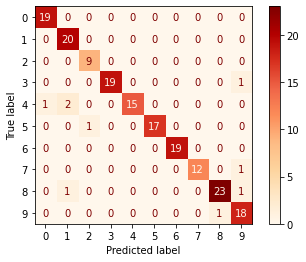

In [354]:
# Creation de classifieur MLP utilisant la validation croisée sur 5 ensembles repetee 3 fois
#  selon differentes combinaisons de parametres
valic_c = RepeatedKFold(n_splits=5, n_repeats=3)
param_mlp= {
    'hidden_layer_sizes': [(15,15),(10,10),(5,5), (3,3,3)],
    'activation': ['identity', 'tanh', 'logistic' ,'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}

mlp = GridSearchCV(MLPClassifier(), param_mlp, n_jobs= -1, cv = valic_c) 
mlp.fit(X_train, Y_train)

# Choix des meilleurs parametres
print("Les meilleurs paramètres sont : ", mlp.best_params_)
print("Le score du classifieur MLP associé à ces derniers et appliqué aux données test est égal à", mlp.best_score_, "i.e le taux de précision est",round(mlp.best_score_*100,2) , "%" ) 
print("La matrice de confusion est :") 
plot_confusion_matrix(mlp.best_estimator_, X_test, Y_test, cmap=plt.cm.OrRd)


Le code ci-dessus permet d'évaluer les performances du classifieur sur l'ensemble de test en termes d'exactitude de classification pour identifier quelle configuration de MLP fonctionne le mieux. Pour ce faire, nous avons utilisé une validation croisée sur $5$ ensembles répétée $3$ fois (temps de calcul estimé à $1$ minutes $20$). Il y a en moyenne $7$ erreurs de predictions sur $180$.


### Question 6 : Classifieur SVM et comparaison 

Nous allons construire un classifieur SVM en validation croisée à $5$ ensembles répétée $10$ fois afin de déterminer les meilleurs paramètres.


Les meilleurs paramètres sont :  {'C': 4, 'kernel': 'rbf'}
Le score du classifieur SVM associé à ces derniers et appliqué aux données test est égal à 0.9903525971792224 i.e le taux de précision est 99.04 %
La matrice de confusion est :


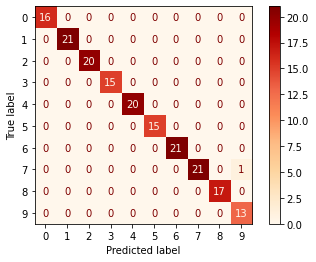

In [331]:
param_svm = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': range(1,15)}

valic_c = RepeatedKFold(n_splits=5, n_repeats=10)
svm = GridSearchCV(SVC(), param_svm, n_jobs=-1, cv=valic_c)
svm = svm.fit(X_train, Y_train)

print("Les meilleurs paramètres sont : ", svm.best_params_)
print("Le score du classifieur SVM associé à ces derniers et appliqué aux données test est égal à", svm.best_score_, "i.e le taux de précision est",round(svm.best_score_*100,2) , "%" ) 
print("La matrice de confusion est :") 
plot_confusion_matrix(svm.best_estimator_, X_test, Y_test, cmap=plt.cm.OrRd)

Les taux de précision des classifeurs sont supérieurs à $95 \%$. Cependant, nous constatons que le classifieur SVM se trompe rarement contrairement au classifieur MLP.
Notons quand même que ce dernier prédit correctement plus de $90 \%$ des données test de chaque classe.

# Conclusion

Un perceptron simple est un classifieur linéaire. Cela signifie qu'il peut uniquement classer des données en deux classes bien distinctes.  
Celui-ci, du fait de sa fonction d'activation, ne peut apprendre à classer correctement un jeu de données non-linéaires. C'est le problème posé par la fonction `XOR`. Un perceptron ne parviendra pas à découper correctement l'espace pour proposer un classement optimal des données. Du moins, pas avec une fonction d'activation classique.  

Dans ce TP, nous avons vu qu'il était possible de résoudre ce problème avec un réseau de neurones multicouches.  
Un perceptron multicouches est ainsi utilisé pour traiter des jeux de données non-linéairement séparables, en utilisant une fonction d'activation non-linéaire.  
Bien choisir les paramètres du perceptron, selon le jeu de données étudié, est donc primordial.
  
Enfin, nous avons déterminé un classifieur MLP dont les paramètres sont optimaux. Malgré tout, le classifieur SVM a montré des résultats plus performants. De plus, le temps de calcul du classifieur SVM est plus court que celui du MLP.



